In [1]:
import warnings
warnings.filterwarnings("ignore", category = FutureWarning)

import os
import keras
import h5py
import librosa
import itertools
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict

from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Activation
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import BatchNormalization

Using TensorFlow backend.


# Read the data

> Helper functions to assist the process to read songs, split then and return an array of spectrograms/melspectrograms

In [2]:
"""
@description: Method to split a song into multiple songs using overlapping windows
"""
def splitsongs(X, y, window = 0.2, overlap = 0.5):
    # Empty lists to hold our results
    temp_X = []
    temp_y = []

    # Get the input song array size
    xshape = X.shape[0]
    chunk = int(xshape*window)
    offset = int(chunk*(1.-overlap))
    
    # Split the song and create new ones on windows
    spsong = [X[i:i+chunk] for i in range(0, xshape - chunk + offset, offset)]
    for s in spsong:
        temp_X.append(s)
        temp_y.append(y)

    return np.array(temp_X), np.array(temp_y)

In [3]:
"""
@description: Method to convert a list of songs to a np array of melspectrograms
"""
def to_melspectrogram(songs, n_fft = 1024, hop_length = 512):
    # Transformation function
    melspec = lambda x: librosa.feature.melspectrogram(x, n_fft = n_fft,
        hop_length = hop_length)[:,:,np.newaxis]

    # map transformation of input songs to melspectrogram using log-scale
    tsongs = map(melspec, songs)
    return np.array(list(tsongs))

In [4]:
def read_data(src_dir, genres, song_samples, spec_format, debug = True):    
    # Empty array of dicts with the processed features from all files
    arr_specs = []
    arr_genres = []

    # Read files from the folders
    for x,_ in genres.items():
        folder = src_dir + x
        
        for root, subdirs, files in os.walk(folder):
            for file in files:
                # Read the audio file
                file_name = folder + "/" + file
                signal, sr = librosa.load(file_name)
                signal = signal[:song_samples]
                
                # Debug process
                if debug:
                    print("Reading file: {}".format(file_name))
                
                # Convert to dataset of spectograms/melspectograms
                signals, y = splitsongs(signal, genres[x])
                
                #print(file_name, " entering the spectro")
                # Convert to "spec" representation
                specs = spec_format(signals)
                
                # Save files
                arr_genres.extend(y)
                arr_specs.extend(specs)
                
                
    return np.array(arr_specs), np.array(arr_genres)

In [5]:
# Parameters
GTMA_dir = '/home/andrewkhalaf/Desktop/Project3/genres/'
song_samples = 660000
genres = {'classical': 0, 'country': 1, 'electronic': 2, 'experimental': 3, 'folk': 4, 
          'hiphop': 5, 'instrumental': 6, 'jazz': 7, 'pop': 8, 'rock': 9}

# Read the data
X, y = read_data(GTMA_dir, genres, song_samples, to_melspectrogram, debug=True)

Reading file: /home/andrewkhalaf/Desktop/Project3/genres/classical/classical.00090.au
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/classical/instrumental.066701
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/classical/instrumental.073150
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/classical/instrumental.113601
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/classical/classical.00028.au
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/classical/classical.00022.au
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/classical/classical.00081.au
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/classical/classical.00078.au
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/classical/classical.00061.au
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/classical/instrumental.010045
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/classical/classical.00018.au
Reading file: /home/andrewkhalaf/Desktop/Project3/

Reading file: /home/andrewkhalaf/Desktop/Project3/genres/classical/instrumental.058726
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/classical/classical.00026.au
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/classical/instrumental.052729
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/classical/classical.00086.au
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/classical/classical.00041.au
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/classical/classical.00084.au
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/classical/classical.00038.au
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/classical/classical.00039.au
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/classical/instrumental.065786
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/classical/instrumental.048393
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/classical/instrumental.143145
Reading file: /home/andrewkhalaf/Desktop/Project3

Reading file: /home/andrewkhalaf/Desktop/Project3/genres/classical/classical.00002.au
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/classical/classical.00000.au
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/classical/classical.00079.au
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/classical/instrumental.059047
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/classical/instrumental.021533
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/classical/classical.00099.au
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/classical/instrumental.065793
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/classical/classical.00054.au
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/classical/instrumental.107510
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/classical/instrumental.010041
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/classical/instrumental.041958
Reading file: /home/andrewkhalaf/Desktop/Project

Reading file: /home/andrewkhalaf/Desktop/Project3/genres/country/country.00038.au
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/country/country.00037.au
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/country/instrumental.126178
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/country/instrumental.004749
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/country/instrumental.014900
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/country/instrumental.014015
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/country/country.00032.au
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/country/country.00093.au
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/country/country.00092.au
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/country/instrumental.129500
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/country/country.00047.au
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/country/instrumental.07498

Reading file: /home/andrewkhalaf/Desktop/Project3/genres/country/country.00049.au
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/country/country.00022.au
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/country/country.00075.au
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/country/country.00062.au
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/country/instrumental.126174
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/country/instrumental.074983
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/country/instrumental.014958
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/country/instrumental.073503
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/country/instrumental.014956
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/country/instrumental.014017
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/country/instrumental.129497
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/country/instrumental

Reading file: /home/andrewkhalaf/Desktop/Project3/genres/country/instrumental.019229
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/country/instrumental.127055
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/country/instrumental.127053
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/country/country.00054.au
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/country/instrumental.132230
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/country/instrumental.127051
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/country/country.00017.au
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/country/instrumental.129483
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/country/instrumental.129485
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/country/country.00085.au
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/country/instrumental.074990
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/country/instrumen

Reading file: /home/andrewkhalaf/Desktop/Project3/genres/electronic/electronic.075431
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/electronic/electronic.041755
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/electronic/electronic.121474
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/electronic/electronic.131796
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/electronic/electronic.125825
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/electronic/electronic.134794
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/electronic/electronic.155293
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/electronic/electronic.071779
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/electronic/electronic.133444
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/electronic/electronic.094037
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/electronic/electronic.115888
Reading file: /home/andrewkhalaf/Desktop/Project3/genr

Reading file: /home/andrewkhalaf/Desktop/Project3/genres/electronic/electronic.066757
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/electronic/electronic.143296
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/electronic/electronic.125657
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/electronic/electronic.123457
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/electronic/electronic.045388
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/electronic/electronic.119823
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/electronic/electronic.126887
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/electronic/electronic.118065
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/electronic/electronic.080794
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/electronic/electronic.111229
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/electronic/electronic.120770
Reading file: /home/andrewkhalaf/Desktop/Project3/genr

Reading file: /home/andrewkhalaf/Desktop/Project3/genres/experimental/experimental.024977
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/experimental/experimental.109063
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/experimental/experimental.038081
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/experimental/experimental.069303
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/experimental/experimental.128879
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/experimental/experimental.148081
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/experimental/experimental.055479
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/experimental/experimental.001095
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/experimental/experimental.097836
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/experimental/experimental.111238
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/experimental/experimental.045423
Reading fi

Reading file: /home/andrewkhalaf/Desktop/Project3/genres/experimental/experimental.054217
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/experimental/experimental.064091
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/experimental/experimental.030636
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/experimental/experimental.117057
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/experimental/experimental.018577
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/experimental/experimental.045953
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/experimental/experimental.035194
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/experimental/experimental.053686
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/experimental/experimental.024902
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/experimental/experimental.121976
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/experimental/experimental.120150
Reading fi

Reading file: /home/andrewkhalaf/Desktop/Project3/genres/experimental/experimental.105027
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/experimental/experimental.088907
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/experimental/experimental.073100
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/experimental/experimental.119579
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/experimental/experimental.127427
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/experimental/experimental.095752
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/experimental/experimental.048346
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/experimental/experimental.127402
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/experimental/experimental.128880
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/experimental/experimental.136877
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/experimental/experimental.139663
Reading fi

Reading file: /home/andrewkhalaf/Desktop/Project3/genres/folk/folk.072050
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/folk/folk.040243
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/folk/folk.113946
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/folk/folk.003906
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/folk/folk.088867
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/folk/folk.057175
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/folk/folk.045513
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/folk/folk.147295
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/folk/folk.116451
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/folk/folk.109448
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/folk/folk.113360
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/folk/folk.057642
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/folk/folk.073170
Reading file: /home/andrewkhalaf/Deskt

Reading file: /home/andrewkhalaf/Desktop/Project3/genres/folk/folk.155298
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/folk/folk.006460
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/folk/folk.092539
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/folk/folk.088864
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/folk/folk.054296
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/folk/folk.105890
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/folk/folk.133780
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/folk/folk.135008
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/folk/folk.058130
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/folk/folk.013930
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/folk/folk.068861
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/folk/folk.000140
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/folk/folk.130347
Reading file: /home/andrewkhalaf/Deskt

Reading file: /home/andrewkhalaf/Desktop/Project3/genres/hiphop/hiphop.094237
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/hiphop/hiphop.053377
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/hiphop/hiphop.015204
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/hiphop/hiphop.00056.au
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/hiphop/hiphop.061162
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/hiphop/hiphop.114037
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/hiphop/hiphop.110070
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/hiphop/hiphop.00069.au
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/hiphop/hiphop.00051.au
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/hiphop/hiphop.011838
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/hiphop/hiphop.052577
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/hiphop/hiphop.083710
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/h

Reading file: /home/andrewkhalaf/Desktop/Project3/genres/hiphop/hiphop.140610
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/hiphop/hiphop.00043.au
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/hiphop/hiphop.110744
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/hiphop/hiphop.00048.au
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/hiphop/hiphop.030057
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/hiphop/hiphop.053368
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/hiphop/hiphop.00015.au
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/hiphop/hiphop.097987
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/hiphop/hiphop.099082
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/hiphop/hiphop.142089
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/hiphop/hiphop.00055.au
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/hiphop/hiphop.119971
Reading file: /home/andrewkhalaf/Desktop/Project3/genres

Reading file: /home/andrewkhalaf/Desktop/Project3/genres/hiphop/hiphop.110266
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/hiphop/hiphop.067787
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/hiphop/hiphop.144181
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/hiphop/hiphop.110082
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/hiphop/hiphop.00059.au
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/hiphop/hiphop.153336
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/hiphop/hiphop.00053.au
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/hiphop/hiphop.121321
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/hiphop/hiphop.061174
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/hiphop/hiphop.116405
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/hiphop/hiphop.00075.au
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/hiphop/hiphop.00024.au
Reading file: /home/andrewkhalaf/Desktop/Project3/genres

Reading file: /home/andrewkhalaf/Desktop/Project3/genres/instrumental/instrumental.062007
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/instrumental/instrumental.133571
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/instrumental/instrumental.133564
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/instrumental/instrumental.133544
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/instrumental/instrumental.115473
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/instrumental/instrumental.019530
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/instrumental/instrumental.126181
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/instrumental/instrumental.145476
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/instrumental/instrumental.133538
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/instrumental/instrumental.054152
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/instrumental/instrumental.125621
Reading fi

Reading file: /home/andrewkhalaf/Desktop/Project3/genres/instrumental/instrumental.111148
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/instrumental/instrumental.115475
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/instrumental/instrumental.130933
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/instrumental/instrumental.111221
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/instrumental/instrumental.131923
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/instrumental/instrumental.081565
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/instrumental/instrumental.097279
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/instrumental/instrumental.126015
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/instrumental/instrumental.120303
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/instrumental/instrumental.155293
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/instrumental/instrumental.149716
Reading fi

Reading file: /home/andrewkhalaf/Desktop/Project3/genres/jazz/jazz.00038.au
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/jazz/jazz.047036
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/jazz/jazz.064362
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/jazz/jazz.013582
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/jazz/jazz.00002.au
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/jazz/jazz.00006.au
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/jazz/jazz.133423
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/jazz/jazz.050369
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/jazz/jazz.072389
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/jazz/jazz.011207
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/jazz/jazz.00062.au
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/jazz/jazz.020463
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/jazz/jazz.051321
Reading file: /home/andrewkhal

Reading file: /home/andrewkhalaf/Desktop/Project3/genres/jazz/jazz.00084.au
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/jazz/jazz.050291
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/jazz/jazz.067040
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/jazz/jazz.00013.au
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/jazz/jazz.039556
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/jazz/jazz.00078.au
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/jazz/jazz.00059.au
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/jazz/jazz.050988
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/jazz/jazz.083643
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/jazz/jazz.051936
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/jazz/jazz.00021.au
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/jazz/jazz.126436
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/jazz/jazz.012602
Reading file: /home/andrewkh

Reading file: /home/andrewkhalaf/Desktop/Project3/genres/jazz/jazz.085890
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/jazz/jazz.073443
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/jazz/jazz.018975
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/jazz/jazz.00010.au
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/jazz/jazz.004705
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/jazz/jazz.00083.au
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/jazz/jazz.083641
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/jazz/jazz.00015.au
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/jazz/jazz.072386
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/jazz/jazz.00074.au
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/jazz/jazz.001151
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/jazz/jazz.073442
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/jazz/jazz.00005.au
Reading file: /home/andrewkh

Reading file: /home/andrewkhalaf/Desktop/Project3/genres/pop/pop.113025
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/pop/pop.027164
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/pop/pop.085600
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/pop/pop.00062.au
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/pop/pop.129393
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/pop/pop.016095
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/pop/pop.00021.au
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/pop/pop.00073.au
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/pop/pop.00072.au
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/pop/pop.111367
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/pop/pop.00048.au
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/pop/pop.00067.au
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/pop/pop.00090.au
Reading file: /home/andrewkhalaf/Desktop/Project3/

Reading file: /home/andrewkhalaf/Desktop/Project3/genres/pop/pop.00051.au
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/pop/pop.00013.au
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/pop/pop.131454
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/pop/pop.00063.au
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/pop/pop.145709
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/pop/pop.00004.au
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/pop/pop.131448
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/pop/pop.028484
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/pop/pop.095475
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/pop/pop.056275
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/pop/pop.00065.au
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/pop/pop.036618
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/pop/pop.019419
Reading file: /home/andrewkhalaf/Desktop/Project3/genr

Reading file: /home/andrewkhalaf/Desktop/Project3/genres/rock/rock.00025.au
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/rock/rock.00063.au
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/rock/rock.00093.au
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/rock/rock.105094
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/rock/rock.00017.au
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/rock/rock.095676
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/rock/rock.012423
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/rock/rock.055399
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/rock/rock.111972
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/rock/rock.00021.au
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/rock/rock.00078.au
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/rock/rock.132235
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/rock/rock.00000.au
Reading file: /home/andr

Reading file: /home/andrewkhalaf/Desktop/Project3/genres/rock/rock.060892
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/rock/rock.00029.au
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/rock/rock.001183
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/rock/rock.134650
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/rock/rock.00095.au
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/rock/rock.00087.au
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/rock/rock.064192
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/rock/rock.142298
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/rock/rock.087621
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/rock/rock.00039.au
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/rock/rock.071272
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/rock/rock.072285
Reading file: /home/andrewkhalaf/Desktop/Project3/genres/rock/rock.118384
Reading file: /home/andrewkhal

In [6]:
#print(len(X), len(y))

#np.save('x_gtzan_npy.npy', X)
#np.save('y_gtzan_npy.npy', y)


#X = np.load('x_gtzan_npy.npy')
#y= np.load('y_gtzan_npy.npy')


In [7]:
# One hot encoding of the labels
y = to_categorical(y)


# Dataset Split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify = y)

X_train, X_val, y_train, Y_val =  train_test_split(X_train, y_train, test_size=0.1, random_state=42, stratify = y_train)

In [9]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape, X_val.shape, Y_val.shape)

(18225, 128, 258, 1) (2250, 128, 258, 1) (18225, 10) (2250, 10) (2025, 128, 258, 1) (2025, 10)


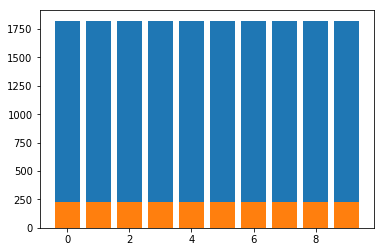

In [10]:
# Histogram for train and test 
values, count = np.unique(np.argmax(y_train, axis=1), return_counts=True)
plt.bar(values, count)

values, count = np.unique(np.argmax(y_test, axis=1), return_counts=True)
plt.bar(values, count)
plt.show()

# Training

In [14]:
from keras.layers import GRU
from keras.layers import CuDNNGRU

# Model Definition
input_shape = X_train[0].shape
num_genres = 10

model = Sequential()
# Conv Block 1
model.add(Conv2D(32, kernel_size=(3, 3), strides=(1, 1), activation='elu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.25))

# Conv Block 2
model.add(Conv2D(32, (3, 3), strides=(1, 1), activation='elu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.25))


# Conv Block 3
model.add(Conv2D(64, (3, 3), strides=(1, 1), activation='elu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.25))

# Conv Block 4
model.add(Conv2D(128, (3, 3), strides=(1, 1), activation='elu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.25))


# Conv Block 5
model.add(Conv2D(128, (3, 3), strides=(1, 1), activation='elu'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(3, 3)))
model.add(Dropout(0.25))

# # Conv Block 6
# model.add(Conv2D(128, (2, 2), strides=(1, 1), activation='elu'))
# model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
# model.add(Dropout(0.2))



# MLP
model.add(Flatten())

model.add(Dense(150))
model.add(Activation('elu'))
model.add(Dropout(0.25))


model.add(Dense(100))
model.add(Activation('elu'))
model.add(Dropout(0.25))

model.add(Dense(50))
model.add(Activation('elu'))
model.add(Dropout(0.25))

model.add(Dense(20))
model.add(Activation('elu'))
model.add(Dropout(0.25))

model.add(Dense(num_genres, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 126, 256, 32)      320       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 63, 128, 32)       0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 63, 128, 32)       0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 61, 126, 32)       9248      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 30, 63, 32)        0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 30, 63, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 28, 61, 64)        18496     
__________

In [16]:
from keras.callbacks import ModelCheckpoint

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])
checkpoint = ModelCheckpoint(filepath='CheckPoints3', monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

hist = model.fit(X_train, y_train,
          batch_size=32,
          epochs=100,
          verbose=1,
          validation_data=(X_val, Y_val),
          callbacks=callbacks_list)

Train on 18225 samples, validate on 2025 samples
Epoch 1/100
18225/18225 [==============================] - 277s 15ms/step - loss: 2.1904 - acc: 0.2234 - val_loss: 1.8473 - val_acc: 0.3215

Epoch 00001: val_acc improved from -inf to 0.32148, saving model to CheckPoints3
Epoch 2/100
18225/18225 [==============================] - 19s 1ms/step - loss: 1.9256 - acc: 0.3063 - val_loss: 1.7372 - val_acc: 0.3477

Epoch 00002: val_acc improved from 0.32148 to 0.34765, saving model to CheckPoints3
Epoch 3/100
18225/18225 [==============================] - 19s 1ms/step - loss: 1.8069 - acc: 0.3507 - val_loss: 1.6241 - val_acc: 0.4321

Epoch 00003: val_acc improved from 0.34765 to 0.43210, saving model to CheckPoints3
Epoch 4/100
18225/18225 [==============================] - 19s 1ms/step - loss: 1.7147 - acc: 0.3883 - val_loss: 1.5067 - val_acc: 0.4558

Epoch 00004: val_acc improved from 0.43210 to 0.45580, saving model to CheckPoints3
Epoch 5/100
18225/18225 [==============================] - 1

18225/18225 [==============================] - 19s 1ms/step - loss: 0.7603 - acc: 0.7347 - val_loss: 0.7166 - val_acc: 0.7457

Epoch 00082: val_acc did not improve from 0.75160
Epoch 83/100
18225/18225 [==============================] - 19s 1ms/step - loss: 0.7549 - acc: 0.7333 - val_loss: 0.7975 - val_acc: 0.7225

Epoch 00083: val_acc did not improve from 0.75160
Epoch 84/100
18225/18225 [==============================] - 19s 1ms/step - loss: 0.7406 - acc: 0.7420 - val_loss: 0.7450 - val_acc: 0.7279

Epoch 00084: val_acc did not improve from 0.75160
Epoch 85/100
18225/18225 [==============================] - 19s 1ms/step - loss: 0.7497 - acc: 0.7357 - val_loss: 0.7359 - val_acc: 0.7343

Epoch 00085: val_acc did not improve from 0.75160
Epoch 86/100
18225/18225 [==============================] - 19s 1ms/step - loss: 0.7585 - acc: 0.7357 - val_loss: 0.8446 - val_acc: 0.7165

Epoch 00086: val_acc did not improve from 0.75160
Epoch 87/100
18225/18225 [==============================] - 20s

In [87]:
from keras.models import load_model

model.save("7516Accuracy-final.hdf5")
#model = load_model('68Accuracy6')

score = model.evaluate(X_test, y_test, verbose=0)
print("val_loss = {:.3f} and testing_acc = {:.3f}".format(score[0], score[1]))



val_loss = 0.727 and testing_acc = 0.730


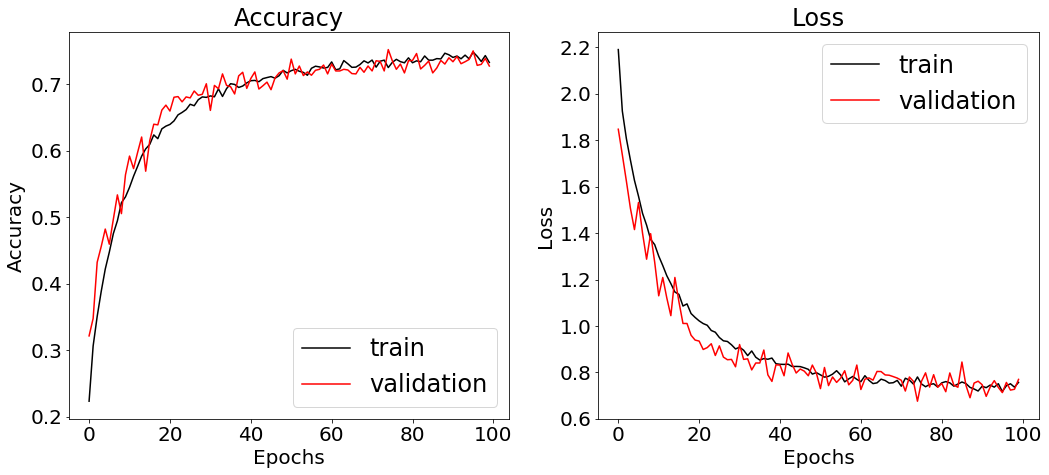

In [18]:
plt.figure(figsize=(15,7))

plt.rcParams.update({'font.size': 20})

plt.subplot(1,2,1)
plt.plot(hist.history['acc'], label='train', color = 'k')
plt.plot(hist.history['val_acc'], label='validation', color = 'r')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(fontsize ='large')

plt.subplot(1,2,2)
plt.plot(hist.history['loss'], label='train', color = 'k')
plt.plot(hist.history['val_loss'], label='validation', color = 'r')
plt.title('Loss', fontsize = 'large')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(fontsize ='large')

plt.tight_layout()
plt.savefig('project-results.png',dpi =400)
plt.show()

In [19]:
#http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Normalized confusion matrix


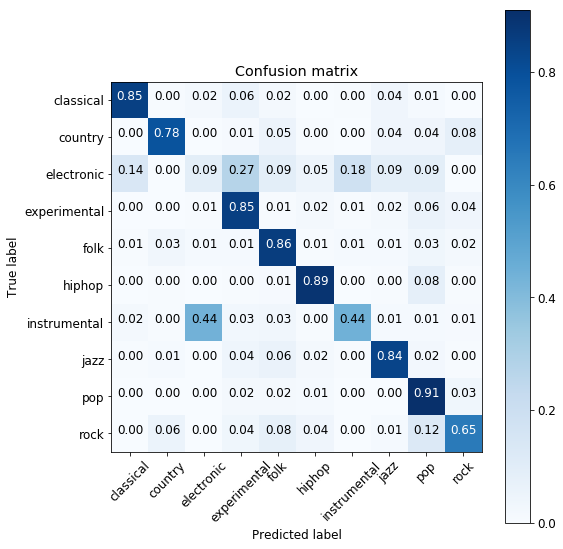

In [163]:
preds = np.argmax(model.predict(X_test), axis = 1)
y_orig = np.argmax(y_test, axis = 1)
cm = confusion_matrix(preds, y_orig)

keys = OrderedDict(sorted(genres.items(), key=lambda t: t[1])).keys()
plt.rcParams.update({'font.size': 12})

plt.figure(figsize=(8,8))
plot_confusion_matrix(cm, keys, normalize=True)

## Model B: LSTM

In [157]:

batch_size = 128
nb_epochs = 75

print("Training X shape: " + str(X_train.shape))
print("Training Y shape: " + str(y_train.shape))
print("Dev X shape: " + str(X_val.shape))
print("Dev Y shape: " + str(Y_val.shape))
print("Test X shape: " + str(X_test.shape))
print("Test Y shape: " + str(y_test.shape))

input_shape = (128, 258)
X_train2 = X_train.squeeze()
X_val2 = X_val.squeeze()
X_test2 = X_test.squeeze()
print (X_train2.shape)

Training X shape: (18225, 128, 258, 1)
Training Y shape: (18225, 10)
Dev X shape: (2025, 128, 258, 1)
Dev Y shape: (2025, 10)
Test X shape: (2250, 128, 258, 1)
Test Y shape: (2250, 10)
(18225, 128, 258)


In [158]:
from keras.layers import LSTM
print('Build LSTM RNN model ...')
model2 = Sequential()
model2.add(LSTM(units=128, dropout=0.5, recurrent_dropout=0.6, return_sequences=True, input_shape=input_shape))

model2.add(Flatten())
model2.add(Dense(150))
model2.add(Activation('elu'))
model2.add(Dropout(0.35))

model2.add(Dense(100))
model2.add(Activation('elu'))
model2.add(Dropout(0.25))

model2.add(Dense(50))
model2.add(Activation('elu'))
model2.add(Dropout(0.25))

model2.add(Dense(units=10, activation='softmax'))

print("Compiling ...")
checkpoint2 = ModelCheckpoint(filepath='CheckPoints_LSTM', monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list2 = [checkpoint2]

model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model2.summary()

print("Training ...")
hist2 = model2.fit(X_train2, y_train, batch_size=batch_size, epochs=nb_epochs,
           verbose=1,callbacks=callbacks_list2, validation_data=(X_val2, Y_val))



Build LSTM RNN model ...
Compiling ...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_64 (LSTM)               (None, 128, 128)          198144    
_________________________________________________________________
flatten_22 (Flatten)         (None, 16384)             0         
_________________________________________________________________
dense_106 (Dense)            (None, 150)               2457750   
_________________________________________________________________
activation_67 (Activation)   (None, 150)               0         
_________________________________________________________________
dropout_194 (Dropout)        (None, 150)               0         
_________________________________________________________________
dense_107 (Dense)            (None, 100)               15100     
_________________________________________________________________
activation_68 (Activation)   (None, 1

18225/18225 [==============================] - 18s 982us/step - loss: 0.4967 - acc: 0.7889 - val_loss: 1.0919 - val_acc: 0.6435

Epoch 00030: val_acc improved from 0.63506 to 0.64346, saving model to CheckPoints_LSTM
Epoch 31/75
18225/18225 [==============================] - 17s 945us/step - loss: 0.4744 - acc: 0.7929 - val_loss: 1.0959 - val_acc: 0.6336

Epoch 00031: val_acc did not improve from 0.64346
Epoch 32/75
18225/18225 [==============================] - 18s 979us/step - loss: 0.4645 - acc: 0.7934 - val_loss: 1.1729 - val_acc: 0.6237

Epoch 00032: val_acc did not improve from 0.64346
Epoch 33/75
18225/18225 [==============================] - 17s 944us/step - loss: 0.4634 - acc: 0.7984 - val_loss: 1.1430 - val_acc: 0.6301

Epoch 00033: val_acc did not improve from 0.64346
Epoch 34/75
18225/18225 [==============================] - 18s 988us/step - loss: 0.4358 - acc: 0.8112 - val_loss: 1.0626 - val_acc: 0.6509

Epoch 00034: val_acc improved from 0.64346 to 0.65086, saving model t

In [159]:
print("\nValidating ...")
score, accuracy = model2.evaluate(X_val2, Y_val, batch_size=batch_size, verbose=1)
print("Dev loss:  ", score)
print("Dev accuracy:  ", accuracy)


print("\nTesting ...")
score, accuracy = model2.evaluate(X_test2, y_test, batch_size=batch_size, verbose=1)
print("Test loss:  ", score)
print("Test accuracy:  ", accuracy)


Validating ...
2025/2025 [==============================] - 1s 422us/step
Dev loss:   0.9536065098680095
Dev accuracy:   0.7022222230169508

Testing ...
2250/2250 [==============================] - 1s 414us/step
Test loss:   1.0762523447672525
Test accuracy:   0.6866666660838657


In [160]:
from keras.models import load_model

model2.save("LSTMAccuracy-final.hdf5")

score = model2.evaluate(X_test2, y_test, verbose=0)
print("val_loss = {:.3f} and testing_acc = {:.3f}".format(score[0], score[1]))



val_loss = 1.076 and testing_acc = 0.687


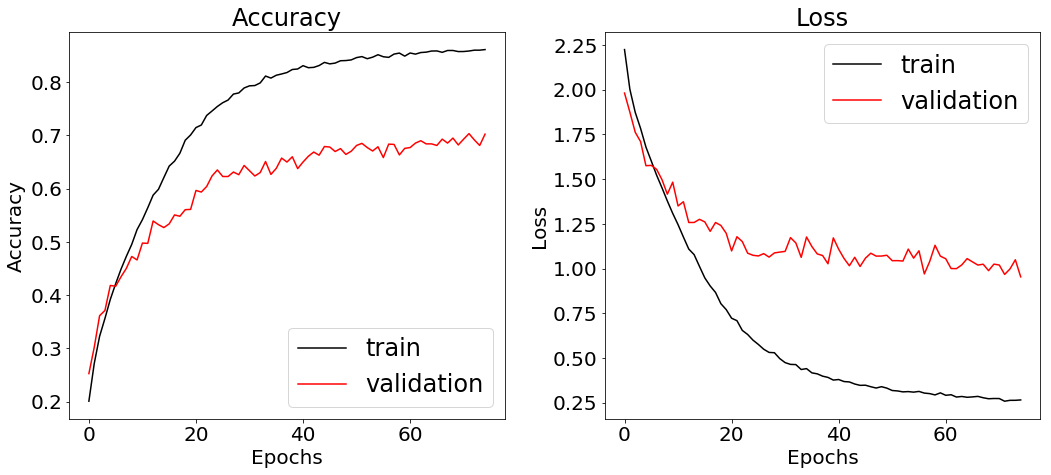

In [164]:
plt.figure(figsize=(15,7))

plt.rcParams.update({'font.size': 20})

plt.subplot(1,2,1)
plt.plot(hist2.history['acc'], label='train', color = 'k')
plt.plot(hist2.history['val_acc'], label='validation', color = 'r')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(fontsize ='large')

plt.subplot(1,2,2)
plt.plot(hist2.history['loss'], label='train', color = 'k')
plt.plot(hist2.history['val_loss'], label='validation', color = 'r')
plt.title('Loss', fontsize = 'large')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(fontsize ='large')

plt.tight_layout()
plt.savefig('project-resultsRNN.png',dpi =400)
plt.show()

Normalized confusion matrix


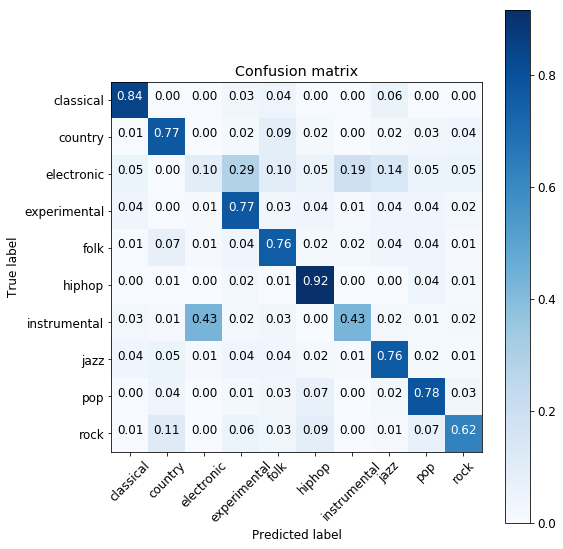

In [166]:
preds2 = np.argmax(model2.predict(X_test2), axis = 1)
y_orig2 = np.argmax(y_test, axis = 1)
cm2 = confusion_matrix(preds2, y_orig2)

keys2 = OrderedDict(sorted(genres.items(), key=lambda t: t[1])).keys()
plt.rcParams.update({'font.size': 12})

plt.figure(figsize=(8,8))
plot_confusion_matrix(cm2, keys2, normalize=True)

# Model C: RCNN

In [152]:
from keras.layers import GRU
from keras.layers import CuDNNGRU
from keras.layers import Reshape

# Model Definition
input_shape = X_train[0].shape
num_genres = 10

model3 = Sequential()
# Conv Block 1
model3.add(Conv2D(32, kernel_size=(3, 3), strides=(1, 1), activation='elu', input_shape=input_shape))
model3.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model3.add(Dropout(0.25))

# Conv Block 2
model3.add(Conv2D(32, (3, 3), strides=(1, 1), activation='elu'))
model3.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model3.add(Dropout(0.25))


# Conv Block 3
model3.add(Conv2D(64, (3, 3), strides=(1, 1), activation='elu'))
model3.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model3.add(Dropout(0.25))

# Conv Block 4
model3.add(Conv2D(128, (3, 3), strides=(1, 1), activation='elu'))
model3.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model3.add(Dropout(0.25))


# Conv Block 5
model3.add(Conv2D(128, (3, 3), strides=(1, 1), activation='elu'))
model3.add(MaxPooling2D(pool_size=(3, 3), strides=(3, 3)))
model3.add(Dropout(0.25))

# # Conv Block 6
# model.add(Conv2D(128, (2, 2), strides=(1, 1), activation='elu'))
# model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
# model.add(Dropout(0.2))

#LSTM

model3.add(Reshape((4,128)))
model3.add(LSTM(units=256, dropout=0.25, recurrent_dropout=0.25, return_sequences=True))


# FC
model3.add(Flatten())

model3.add(Dense(150))
model3.add(Activation('elu'))
model3.add(Dropout(0.25))


model3.add(Dense(100))
model3.add(Activation('elu'))
model3.add(Dropout(0.25))

model3.add(Dense(50))
model3.add(Activation('elu'))
model3.add(Dropout(0.25))

model3.add(Dense(20))
model3.add(Activation('elu'))
model3.add(Dropout(0.25))

model3.add(Dense(num_genres, activation='softmax'))

model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_126 (Conv2D)          (None, 126, 256, 32)      320       
_________________________________________________________________
max_pooling2d_123 (MaxPoolin (None, 63, 128, 32)       0         
_________________________________________________________________
dropout_185 (Dropout)        (None, 63, 128, 32)       0         
_________________________________________________________________
conv2d_127 (Conv2D)          (None, 61, 126, 32)       9248      
_________________________________________________________________
max_pooling2d_124 (MaxPoolin (None, 30, 63, 32)        0         
_________________________________________________________________
dropout_186 (Dropout)        (None, 30, 63, 32)        0         
_________________________________________________________________
conv2d_128 (Conv2D)          (None, 28, 61, 64)        18496     
__________

In [153]:
from keras.callbacks import ModelCheckpoint

model3.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

checkpoint3 = ModelCheckpoint(filepath='CheckPoints3', monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list3 = [checkpoint3]

hist3 = model3.fit(X_train, y_train,
          batch_size=128,
          epochs=100,
          verbose=1,
          validation_data=(X_val, Y_val),
          callbacks=callbacks_list3)

Train on 18225 samples, validate on 2025 samples
Epoch 1/100
18225/18225 [==============================] - 24s 1ms/step - loss: 2.2042 - acc: 0.1986 - val_loss: 1.9128 - val_acc: 0.2909

Epoch 00001: val_acc improved from -inf to 0.29086, saving model to CheckPoints3
Epoch 2/100
18225/18225 [==============================] - 19s 1ms/step - loss: 1.9237 - acc: 0.3057 - val_loss: 1.7535 - val_acc: 0.3664

Epoch 00002: val_acc improved from 0.29086 to 0.36642, saving model to CheckPoints3
Epoch 3/100
18225/18225 [==============================] - 20s 1ms/step - loss: 1.7798 - acc: 0.3646 - val_loss: 1.5714 - val_acc: 0.4370

Epoch 00003: val_acc improved from 0.36642 to 0.43704, saving model to CheckPoints3
Epoch 4/100
18225/18225 [==============================] - 19s 1ms/step - loss: 1.6904 - acc: 0.3962 - val_loss: 1.4788 - val_acc: 0.4632

Epoch 00004: val_acc improved from 0.43704 to 0.46321, saving model to CheckPoints3
Epoch 5/100
18225/18225 [==============================] - 20s

18225/18225 [==============================] - 19s 1ms/step - loss: 0.5991 - acc: 0.7678 - val_loss: 0.6277 - val_acc: 0.7635

Epoch 00082: val_acc did not improve from 0.77531
Epoch 83/100
18225/18225 [==============================] - 20s 1ms/step - loss: 0.5905 - acc: 0.7684 - val_loss: 0.6649 - val_acc: 0.7615

Epoch 00083: val_acc did not improve from 0.77531
Epoch 84/100
18225/18225 [==============================] - 20s 1ms/step - loss: 0.6049 - acc: 0.7642 - val_loss: 0.6503 - val_acc: 0.7659

Epoch 00084: val_acc did not improve from 0.77531
Epoch 85/100
18225/18225 [==============================] - 20s 1ms/step - loss: 0.6062 - acc: 0.7674 - val_loss: 0.6156 - val_acc: 0.7644

Epoch 00085: val_acc did not improve from 0.77531
Epoch 86/100
18225/18225 [==============================] - 19s 1ms/step - loss: 0.6142 - acc: 0.7607 - val_loss: 0.6621 - val_acc: 0.7570

Epoch 00086: val_acc did not improve from 0.77531
Epoch 87/100
18225/18225 [==============================] - 20s

In [154]:
from keras.models import load_model

model3.save("RCNNAccuracy-final.hdf5")
#model = load_model('68Accuracy6')

score = model3.evaluate(X_test, y_test, verbose=0)
print("val_loss = {:.3f} and testing_acc = {:.3f}".format(score[0], score[1]))



val_loss = 0.612 and testing_acc = 0.772


In [155]:
print("\nValidating ...")
score, accuracy = model3.evaluate(X_val, Y_val, batch_size=batch_size, verbose=1)
print("Dev loss:  ", score)
print("Dev accuracy:  ", accuracy)


print("\nTesting ...")
score, accuracy = model3.evaluate(X_test, y_test, batch_size=batch_size, verbose=1)
print("Test loss:  ", score)
print("Test accuracy:  ", accuracy)


Validating ...
2025/2025 [==============================] - 1s 453us/step
Dev loss:   0.5949844184922584
Dev accuracy:   0.7787654328051908

Testing ...
2250/2250 [==============================] - 1s 440us/step
Test loss:   0.6117959294319153
Test accuracy:   0.7715555565092299


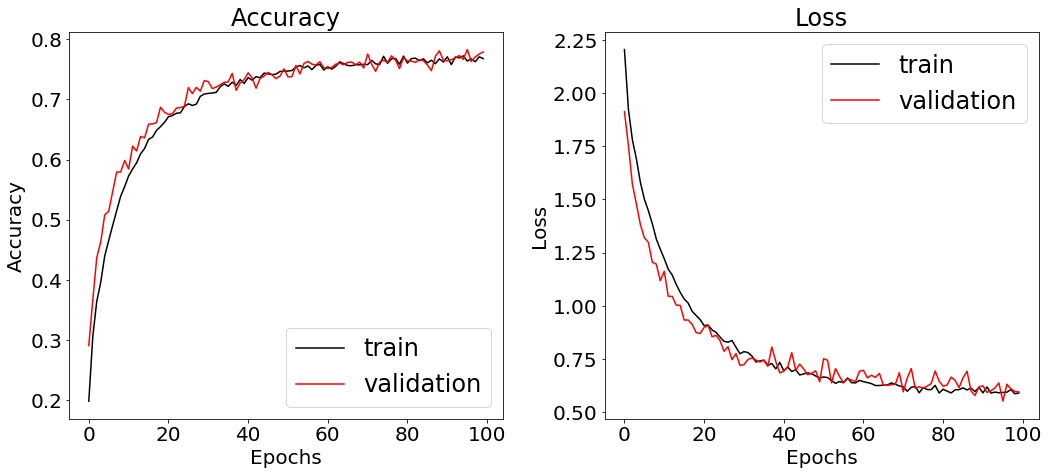

In [156]:
plt.figure(figsize=(15,7))

plt.rcParams.update({'font.size': 20})

plt.subplot(1,2,1)
plt.plot(hist3.history['acc'], label='train', color = 'k')
plt.plot(hist3.history['val_acc'], label='validation', color = 'r')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(fontsize ='large')

plt.subplot(1,2,2)
plt.plot(hist3.history['loss'], label='train', color = 'k')
plt.plot(hist3.history['val_loss'], label='validation', color = 'r')
plt.title('Loss', fontsize = 'large')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(fontsize ='large')

plt.tight_layout()
plt.savefig('project-results-RCNN.png',dpi =400)
plt.show()

Normalized confusion matrix


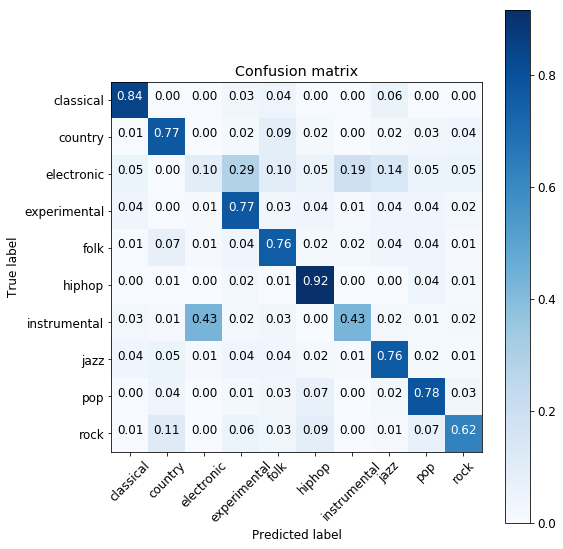

In [167]:
preds3 = np.argmax(model3.predict(X_test), axis = 1)
y_orig3 = np.argmax(y_test, axis = 1)
cm3 = confusion_matrix(preds3, y_orig3)

keys3 = OrderedDict(sorted(genres.items(), key=lambda t: t[1])).keys()
plt.rcParams.update({'font.size': 12})

plt.figure(figsize=(8,8))
plot_confusion_matrix(cm2, keys3, normalize=True)